<a href="https://colab.research.google.com/github/sairahulkhanapuram/SML-ASS/blob/main/smlass_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
housing=pd.read_csv("/content/housing.csv (1).zip")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
container = ['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms']
result = housing[container]
mle_params = {}

In [ ]:
for i  in container:
  mean = np.mean(housing[i])
  variance = np.var(housing[i])
  mle_params[i] = {'mean': mean, 'variance': variance}
  print(mle_params)

{'latitude': {'mean': 35.63186143410853, 'variance': 4.562071602892517}}
{'latitude': {'mean': 35.63186143410853, 'variance': 4.562071602892517}, 'housing_median_age': {'mean': 28.639486434108527, 'variance': 158.38858617035862}}
{'latitude': {'mean': 35.63186143410853, 'variance': 4.562071602892517}, 'housing_median_age': {'mean': 28.639486434108527, 'variance': 158.38858617035862}, 'total_rooms': {'mean': 2635.7630813953488, 'variance': 4759214.512668024}}
{'latitude': {'mean': 35.63186143410853, 'variance': 4.562071602892517}, 'housing_median_age': {'mean': 28.639486434108527, 'variance': 158.38858617035862}, 'total_rooms': {'mean': 2635.7630813953488, 'variance': 4759214.512668024}, 'total_bedrooms': {'mean': 537.8705525375618, 'variance': 177556.6871536956}}


In [ ]:
from scipy.stats import norm

def log_likelihood(x, mean, variance):
    return np.sum(norm.logpdf(x, loc=mean, scale=np.sqrt(variance)))
latitude_data = housing['latitude']

for value in [50, 75, 80]:
    ll = log_likelihood(latitude_data, value, mle_params['latitude']['variance'])
    print(f"Log-likelihood for {value}: {ll}")

mle_ll = log_likelihood(latitude_data, mle_params['latitude']['mean'], mle_params['latitude']['variance'])
print(f"Log-likelihood using MLE parameters: {mle_ll}")

Log-likelihood for 50: -511952.21343833976
Log-likelihood for 75: -3550913.612292702
Log-likelihood for 80: -4498025.423790895
Log-likelihood using MLE parameters: -44950.34809993984


In [ ]:
import pandas as pd
california_housing = housing

columns = ['latitude', 'total_rooms', 'housing_median_age', 'total_bedrooms']
bins = [5, 10, 15, 20]

for col in columns:
    density, _ = np.histogram(california_housing[col], bins=bins, density=True)
    print(f"Density for {col}: {density}")

Density for latitude: [nan nan nan]
Density for total_rooms: [0.02666667 0.02666667 0.14666667]
Density for housing_median_age: [0.03312145 0.04918033 0.11769823]
Density for total_bedrooms: [0.05981308 0.05981308 0.08037383]


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


ValueError: 'bins' is not a valid estimator for `bins`

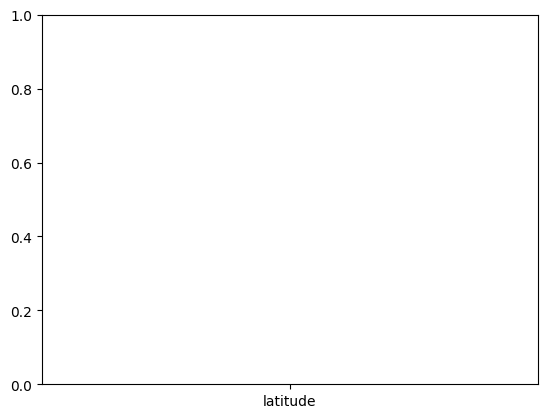

In [ ]:
import matplotlib.pyplot as plt
plt.hist(columns, bins='bins',color='blue',density='true')
plt.xlabel('Latitude')
plt.ylabel('Frequency')
plt.title('Histogram of Latitude')
plt.show()